In [1]:
import sys
sys.path.append('../python/')

In [104]:
import pandas as pd
import imp
import cdr
import csv
import json
import os.path
from scipy.spatial.distance import cosine
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

In [69]:
imp.reload(cdr)

<module 'cdr' from '../python/cdr.py'>

In [70]:
dfs = {}

# Read all the files in Milano
for month in {"11","12"}:
    for day in range(1,32):
        to_read = '../../data/CDR/sms-call-internet-mi-2013-' + month + '-' + str(day).zfill(2) + '.txt'
        
        if os.path.isfile(to_read):
            dfs[month + str(day).zfill(2)] = pd.read_csv(to_read, delimiter='\t', header=None) 

In [72]:
file = '../../data/GeoJSON/milano-grid.geojson'
with open(file) as f:
    grid = pd.read_json(f, typ='Series')
    
smsIn, smsOut, callIn, callOut, internet = cdr.calculate_cosine_similarity(grid, dfs, '1101')

In [ ]:
# writing the file
output_filename = '../../data/CDR/generated/smsIn_similarity.csv'
with open(output_filename, 'w') as f: 
    w = csv.writer(f)
    w.writerows([['day','similarity']])
    for row in smsIn.items():
        w.writerows([row])

output_filename = '../../data/CDR/generated/smsOut_similarity.csv'
with open(output_filename, 'w') as f: 
    w = csv.writer(f)
    w.writerows([['day','similarity']])
    for row in smsOut.items():
        w.writerows([row])

output_filename = '../../data/CDR/generated/callIn_similarity.csv'
with open(output_filename, 'w') as f: 
    w = csv.writer(f)
    w.writerows([['day','similarity']])
    for row in callIn.items():
        w.writerows([row])
        
output_filename = '../../data/CDR/generated/callOut_similarity.csv'
with open(output_filename, 'w') as f: 
    w = csv.writer(f)
    w.writerows([['day','similarity']])
    for row in callOut.items():
        w.writerows([row])
        
output_filename = '../../data/CDR/generated/internet_similarity.csv'
with open(output_filename, 'w') as f: 
    w = csv.writer(f)
    w.writerows([['day','similarity']])
    for row in internet.items():
        w.writerows([row])
        
print ("file generated.")

In [74]:
#sorting
smsIn = sorted(smsIn.items(), key=lambda s: s[0])
smsOut = sorted(smsOut.items(), key=lambda s: s[0])
callIn = sorted(callIn.items(), key=lambda s: s[0])
callOut = sorted(callOut.items(), key=lambda s: s[0])
internet = sorted(internet.items(), key=lambda s: s[0])

In [93]:
df = pd.DataFrame(smsIn,columns=['Date', 'smsIn'])
df.set_index(df['Date'], inplace=True)
df['smsOut'] = pd.Series(smsOut)
df['callIn'] = pd.Series(callIn)
df['callOut'] = pd.Series(callOut)
df['internet'] = pd.Series(internet)

,Date,smsIn,smsOut,callIn,callOut,internet
Date,,,,,,
1102,1102,0.980468,0.958302,0.988919,0.988140,0.993633
1103,1103,0.983880,0.924469,0.990726,0.989904,0.993797
1104,1104,0.917411,0.874590,0.938613,0.938912,0.953618
1105,1105,0.910487,0.865276,0.931172,0.931630,0.948243
1106,1106,0.905545,0.866923,0.927596,0.930168,0.948600
1107,1107,0.900128,0.848736,0.929063,0.928721,0.944973
1108,1108,0.902426,0.855808,0.932447,0.933272,0.948425
1109,1109,0.946116,0.898060,0.970045,0.974080,0.979058
1110,1110,0.950470,0.895918,0.973715,0.978632,0.980958


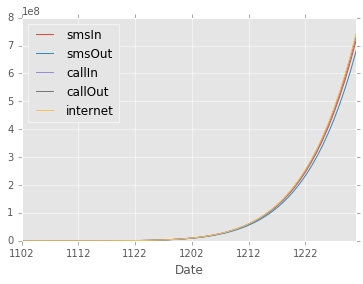

In [105]:
# pandas tiem-series plotting
plt.figure()
df.plot()

In [ ]:
plt.show()

In [5]:
#unit testing
cdrr = pd.read_csv('../../data/CDR/sms-call-internet-mi-2013-12-01.txt', delimiter='\t', header=None)
file = '../../data/GeoJSON/milano-grid.geojson'

joined = cdr.join_cdr_grid(cdrr, grid)
joined.fillna(0,inplace=True)

for i in range(1,10000):    
    if i not in joined.id.values:
        print (i)

file generated.
